# Module 5 - Modern Portfolio Theory

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

## Query 5.1
 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Datasets/GMRINFRA.csv')

In [3]:
df['Returns'] = df['Close Price'].pct_change(periods = 1)
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

In [4]:
mean_return = df['Returns'].mean()
return_stdev = df['Returns'].std()
annualised_return = round(mean_return * 252,2)
annualised_stdev = round(return_stdev * np.sqrt(252),2)
print ('The annualised mean return of stock {} is {},and the annualised volatility is {}'\
       .format('GMRINFRA',annualised_return,annualised_stdev))

The annualised mean return of stock GMRINFRA is 0.04,and the annualised volatility is 0.48


## Query 5.2
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio.

In [5]:
df1 = pd.read_csv("Datasets/AXISBANK.csv")#LARGE CAP
df2 = pd.read_csv("Datasets/SUZLON.csv")#SMALL CAP
df3 = pd.read_csv("Datasets/INFY.csv")# LARGE CAP
df4 = pd.read_csv("Datasets/JETAIRWAYS.csv")#SMALL CAP
df5 = pd.read_csv("Datasets/APOLLOTYRE.csv")#MID CAP

In [6]:
df1 = df1[df1.Series == 'EQ']
df2 = df2[df2.Series == 'EQ']
df3 = df3[df3.Series == 'EQ']
df4 = df4[df4.Series == 'EQ']
df5 = df5[df5.Series == 'EQ']
for x in [df1,df2,df3,df4,df5]:
    x['Returns'] = x['Close Price'].pct_change(periods = 1)
    x.dropna(inplace = True)
    x.reset_index(drop=True, inplace=True)

In [7]:
df6 = pd.DataFrame()
df6['AXISBANK'] = df1['Returns']
df6['SUZLON'] = df2['Returns']
df6['INFY'] = df3['Returns']
df6['JETAIRWAYS'] = df4['Returns']
df6['APOLLOTYRE'] = df5['Returns']

In [8]:
mean_daily_returns = df6.mean()
cov_matrix = df6.cov()
#set array holding portfolio weights of each stock
weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
print('Portfolio expected annualised return is {} and volatility is {}'\
      .format(portfolio_return,portfolio_std_dev))

Portfolio expected annualised return is -0.16 and volatility is 0.26


## Query 5.3 
 Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [9]:
stocks = ['AXISBANK','SUZLON','INFY','JETAIRWAYS','APOLLOTYRE']
mean_daily_returns = df6.mean()
cov_matrix = df6.cov()
#set number of runs of random portfolio weights
num_portfolios = 30000
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

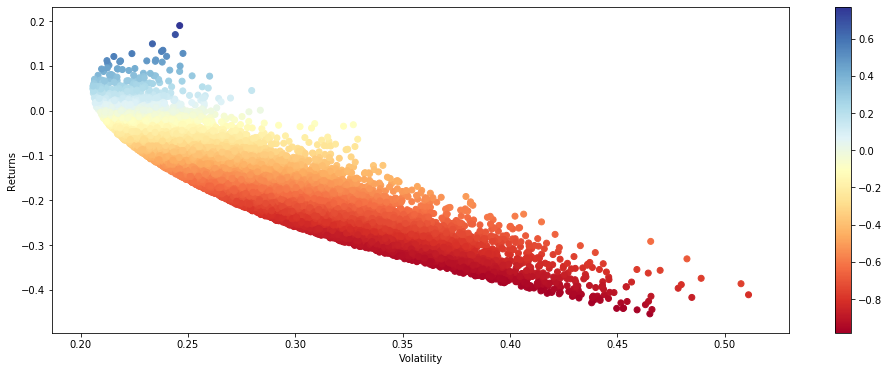

In [10]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(16.5,6))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.show()

## Query 5.4
Portfolio 1 - The Sharpe ratio is the highest

Portfolio 2 - The volatility is the lowest.

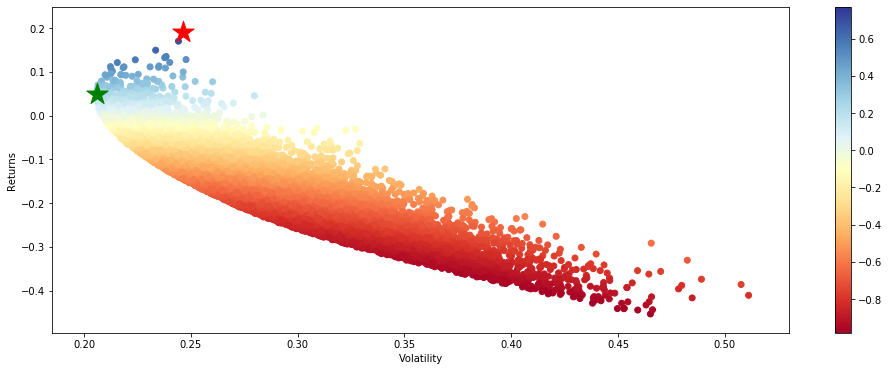

In [11]:
#create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(16.5,6))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker='*',color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker='*',color='g',s=500)
plt.show()

### Observations:
1. The Sharpe ratio uses standard deviation to measure a fund's risk-adjusted returns. The higher a fund's Sharpe ratio, the better a fund's returns have been relative to the risk it has taken on. Because it uses standard deviation, the Sharpe ratio can be used to compare risk-adjusted returns across all fund categories.
2. Stock market volatility is arguably one of the most misunderstood concepts in investing. Simply put, volatility is the range of price change a security experiences over a given period of time. If the price stays relatively stable, the security has low volatility. A highly volatile security is one that hits new highs and lows, moves erratically, and experiences rapid increases and dramatic falls. So, We generally trade with lower volatility in long-term investment.